#### 單位房價與房屋距離捷運站

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_excel('RealEstateValuationDataset.xlsx')
##資料來源：http://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set
df.head(5)

,No,TransactionDate,HouseAge,DistanceToTheNearestMRTStation,NumberOfConvenienceStores,Latitude,Longitude,HousePriceOfUnitArea
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
MRT = np.array(df.DistanceToTheNearestMRTStation)
HousePriceUA = np.array(df.HousePriceOfUnitArea)

In [5]:
xMRT = MRT.reshape(414,1)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(xMRT,HousePriceUA,test_size = 0.3,random_state=787) #30%做為測試資料

In [7]:
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
HPPredict = regr.predict(x_test) 
regr.predict([x_test[5]])

array([43.48762819])

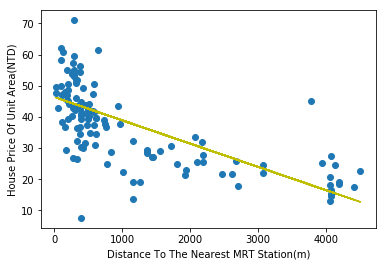

In [19]:
plt.scatter(x_test,y_test)
plt.plot(x_test,HPPredict,'y') #看起來購屋意向滿接近現實。仍有其他因素會導致離捷運站近，但單位房價低的情況，所以還有其他因子可以列入分析
plt.xlabel("Distance To The Nearest MRT Station(m)")
plt.ylabel("House Price Of Unit Area(NTD)");

In [173]:
regr.score(x_test,y_test) #單位房價與房屋距離捷運站距離的準確率

0.45719672536301714

#### 針對單位房價與屋齡再進行一次回歸分析

Text(0,0.5,'House Price Of Unit Area(NTD)')

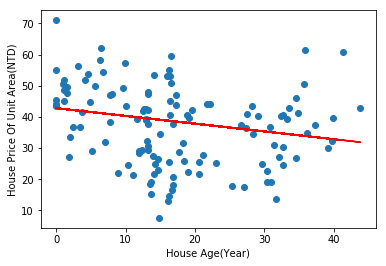

In [20]:
HouseAge = np.array(df.HouseAge)
xHouseAge = HouseAge.reshape(414,1)
x1_train,x1_test,y1_train,y1_test = train_test_split(xHouseAge,HousePriceUA,test_size = 0.3,random_state=787)
regr.fit(x1_train,y1_train)
HPPredictHA = regr.predict(x1_test) 
plt.scatter(x1_test,y1_test)
plt.plot(x1_test,HPPredictHA,'r');
plt.xlabel("House Age(Year)")
plt.ylabel("House Price Of Unit Area(NTD)")

In [184]:
regr.score(x1_test,y1_test) #單位房價與屋齡無正相關性

0.0415997529691996